In [1]:
%matplotlib inline
%matplotlib notebook


==========================================
GMM GAN 
==========================================

An example using a GAN and GMMs


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
ds = tf.contrib.distributions
slim = tf.contrib.slim

/home/bruno/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
# def sample_mog(batch_size, n_mixture=8, std=0.01, radius=1.0):
#     thetas = np.linspace(0, 2 * np.pi, n_mixture)
#     xs, ys = radius * np.sin(thetas), radius * np.cos(thetas)
#     cat = ds.Categorical(tf.zeros(n_mixture))
#     comps = [ds.MultivariateNormalDiag([xi, yi], [std, std]) for xi, yi in zip(xs.ravel(), ys.ravel())]
#     data = ds.Mixture(cat, comps)
#     return data.sample(batch_size)

In [13]:
def sample_mog(batch_size, n_mixture=16, std=0.5):
    x = np.linspace(-5,4,4)
    xs, ys = np.meshgrid(x, x)
    xs, ys = xs.flatten(), ys.flatten()
    cat = ds.Categorical(tf.zeros(n_mixture))
    comps = [ds.MultivariateNormalDiag([xi, yi], [std, std]) for xi, yi in zip(xs.ravel(), ys.ravel())]
    data = ds.Mixture(cat, comps)
    return data.sample(batch_size)

In [46]:
a = sample_mog(batch_size=1000, std=0.2)

In [47]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [48]:
x=sess.run(a)

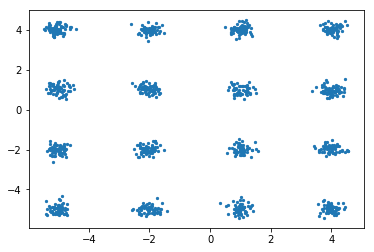

In [49]:
plt.scatter(x[:,0],x[:,1],s=5)
plt.show()